In [28]:
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import numpy as np

df = pd.read_csv('../data/winequality-white.csv', sep=";") 
columns =  df.columns.tolist()
columns.pop()

preprocessor = ColumnTransformer(
    transformers=[('min-max-scaling', StandardScaler(), columns)],
    remainder='passthrough'
)
preprocessed_data = preprocessor.fit_transform(df)

new_df = pd.DataFrame(preprocessed_data, columns = df.columns.tolist())

# the preprocessed classes could be 'less than 5', '5', '6', '7', 'larger than 7'. 
def label_map(label):
    label = int(label)
    if label < 5:
        return 1
    elif label == 5:
        return 2
    elif label == 6:
        return 3
    elif label == 7:
        return 4
    elif label > 7:
        return 5

new_labels = [label_map(label) for label in df['quality'].values]
new_df['quality'] = new_labels

new_df.to_csv('../data/preprocessed.csv', index=False)

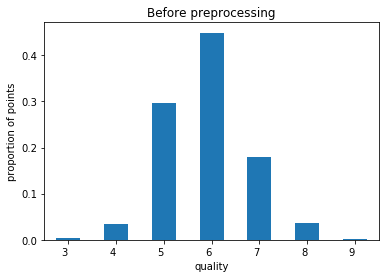

In [25]:
from matplotlib import pylab as plt
pd.value_counts(df['quality'],normalize=True).sort_index().plot.bar()
plt.ylabel('proportion of points')
plt.xlabel('quality')
plt.title('Before preprocessing')
plt.xticks(rotation=0, ha='right')
plt.savefig('../figures/imbalanced_dataset.png',dpi=300)
plt.show()